# <center><b>PROJECT 2: Image Processing</b></center>
### <center> Class: 20CLC11</center>
### <center> Student: Mai Quý Trung - 20127370</center>

### <b> <u>Bước 1 </u>: Import thư viện </b>
Em sử dụng các thư viện như sau: 
- `matplotlib`: dùng `plt` để xuất ảnh dưới dạng figure và lưu lại dưới dạng png/pdf
- `numpy`: thư viện dùng để xử lí các thông tin trên các ma trận n chiều và random choice
- `PIL`: sử dụng `Image` từ thư viện này để đọc ảnh và chuyển chúng sang dạng ảnh RGB để thao tác trên ma trận
- `math`: em sử dụng thư viện này để tính các hàm cos(), sin() và thao tác với số pi cho yêu cầu 7

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math

### <b> <u>Bước 2 </u>: Khởi tạo các giá trị ban đầu </b>
Hàm dưới đây sẽ hoạt động như sau:
- Cho người dùng nhập vào tên file
- Cho người dùng nhập vào định dạng file muốn xuất (png/pdf)
- Sau đó hàm sẽ xử lí chuỗi lấy tên của file (không chứa extension) và định dạng file muốn xuất ra

In [3]:
def initialize():
    filename = str(input("Enter filename: "))
    index = filename.find(".")
    name = filename[0:index]
    type = filename[index+1:]
    return filename, name, type

### <b> <u>Bước 3 </u>: Xử lí ảnh, chuyển đổi từ file raw sang ma trận các pixel màu </b>
Các bước hàm thực hiện như sau:
- Hàm nhận input argument là filename từ người dùng nhập vào
- Sau đó sử dụng thư viện `PIL` hàm `Image.open` và `convert('RGB')` để đọc ảnh và chuyển ảnh sang dạng ảnh RGB gồm 3 màu: R cho màu đỏ (Red), G cho màu xanh lá (Green), B cho màu xanh dương
- Tiếp theo ta sử dụng hàm `np.array` để chuyển ảnh RGB sang ma trận 3 chiều gồm: chiều cao, chiều rộng và mỗi pixel là 1 mảng màu tương ứng với 3 màu RGB
- Chuyển đổi từ ma trận 2 chiều với các mảng màu rgb/rgba sang ma trận 1 chiều với hàm `reshape`
- Sau đó lưu các thông số chiều cao, chiều rộng và số lượng màu của ảnh vào và trả về các giá trị đó

In [4]:
def handling_picture(filename):
    image = np.array(Image.open(filename).convert('RGB'))
    h, w, c = image.shape[0], image.shape[1], image.shape[2]
    image = image.reshape(h * w, c)
    return image, h, w, c

### <b> <u>Bước 4 </u>: Viết hàm truncate </b>
##### Hàm có tác dụng tránh để giá trị của mỗi màu trong RGB bị vượt quá [0, 255] bằng cách lấy min của pixel và 255 sau đó lấy max của kết quả vừa ra với số 0:
- Giá trị của pixel phải nằm trong khoảng từ 0 đến 255.
- Nếu giá trị pixel lớn hơn 255, pixel đó sẽ được gán bằng 255.
- Nếu giá trị pixel nhỏ hơn 0, pixel đó sẽ được gán bằng 0.

In [5]:
def truncate_pixel(pixel):
    return max(min(pixel, 255), 0)

### <b> <u>Bước 5 </u>: Viết các hàm theo yêu cầu đồ án </b>

#### <b>1. Điều chỉnh độ sáng cho ảnh màu RGB</b>
##### Hàm có tác dụng thay đổi độ sáng của ảnh:
- Tham số truyền vào gồm ma trận ảnh 1 chiều gồm các pixel màu và độ sáng muốn tăng/giảm (dưới dạng int).
- Với mỗi pixel màu là 1 mảng gồm 3 phần tử tương ứng 3 màu trong RGB, ta sẽ tịnh tiến giá trị của mỗi màu theo lượng sáng muốn tăng/giảm.
- Tuy nhiên, giá trị của mỗi màu sau khi tịnh tiến phải nằm trong khoảng [0, 255] nên chúng ta sẽ sử dụng hàm `truncate_pixel` để thực hiện điều đó.
- Đầu ra của hàm sẽ là ma trận các pixel sau khi đã được thay đổi giá trị độ sáng

In [6]:
def modify_exposure(img_1d, brightness):
    return np.array([[truncate_pixel(int(pixel[i] + brightness)) for i in range(len(img_1d[0]))] for pixel in img_1d]).astype(np.uint8)

##### Hàm có tác dụng xử lý yêu cầu 1:
- Đầu tiên, hàm sẽ lấy tên file được nhập từ người dùng và định dạng file muốn xuất (png/pdf) thông qua hàm `initialize`
- Sau đó, ảnh sẽ được chuyển sang ma trận các pixel màu thông qua hàm `handling_picture`
- Tiếp theo, ta cho người dùng nhập vào độ sáng muốn tăng/giảm
- Cuối cùng, ma trận ảnh và lượng sáng tăng/giảm sẽ được truyền vào hàm `modify_exposure` và sau đó được in ra màn hình bằng `plt.imshow` và xuất ra file bằng `plt.imsave`

In [7]:
def feature_1():
    filename, name, type = initialize()
    image, h, w, c = handling_picture(filename)
    brightness = float(input("Exposure (-255 to 255): "))
    exp_img = modify_exposure(image, brightness)
    data = exp_img.reshape(h, w, c)
    plt.imshow(data)
    plt.imsave(name + "_exposure." + type, data)

#### <b>2. Điều chỉnh độ tương phản cho ảnh màu RGB</b>
##### Hàm có tác dụng thay đổi độ tương phản của ảnh
- Tham số truyền vào gồm ma trận ảnh 1 chiều gồm các pixel màu và độ tương phản muốn tăng/giảm (dưới dạng int).
- Đầu tiên, ta sẽ tạo 1 biến factor có giá trị như sau: factor = (259 * (contrast + 255)) / (255 * (259 - contrast)). Đây là giá trị tương phản.
- Sau đó, với mỗi giá trị trong mỗi pixel màu của ma trận ảnh, ta sẽ ánh xạ chúng qua 1 hàm như sau: factor * (color - 128) + 128 (với color là gía trị trong 3 màu RGB)
- Tuy nhiên, giá trị của mỗi màu sau khi ánh xạ phải nằm trong khoảng [0, 255] nên chúng ta sẽ sử dụng hàm `truncate_pixel` để thực hiện điều đó.
- Đầu ra của hàm sẽ là ma trận các pixel sau khi đã được thay đổi giá trị tương phản

In [8]:
def modify_contrast(img_1d, contrast):
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    return np.array([[truncate_pixel(factor * (pixel[i] - 128) + 128) for i in range(len(img_1d[0]))] for pixel in img_1d]).astype(np.uint8)

##### Hàm có tác dụng xử lý yêu cầu 2:
- Đầu tiên, hàm sẽ lấy tên file được nhập từ người dùng và định dạng file muốn xuất (png/pdf) thông qua hàm `initialize`
- Sau đó, ảnh sẽ được chuyển sang ma trận các pixel màu thông qua hàm `handling_picture`
- Tiếp theo, ta cho người dùng nhập vào độ tương phản muốn tăng/giảm
- Cuối cùng, ma trận ảnh và lượng tương phản tăng/giảm sẽ được truyền vào hàm `modify_contrast` và sau đó được in ra màn hình bằng `plt.imshow` và xuất ra file bằng `plt.imsave`

In [9]:
def feature_2():
    filename, name, type = initialize()
    image, h, w, c = handling_picture(filename)
    contrast = float(input("Contrast (-255 to 255): "))
    exp_img = modify_contrast(image, contrast)
    data = exp_img.reshape(h, w, c)
    plt.imshow(data)
    plt.imsave(name + "_contrast." + type, data)

#### <b>3. Lật ảnh ngang/dọc</b>
##### Hàm có tác dụng lật ảnh ngang/dọc:
- Các thực hiện hàm sẽ không quá cầu kì, 2 các lật ảnh ngang và dọc đều có nguyên lí như nhau: `vertical` để lật ảnh qua trục dọc còn `horizontal` để lật ảnh qua trục ngang.
- Tham số truyền vào sẽ là ma trận ảnh 2 chiều gồm các pixel màu, chiều cao ảnh, chiều rộng ảnh và cách lật ảnh (ngang/dọc)
- Với trục cho trước làm chuẩn, 2 pixel đối xứng nhau sẽ được đổi chỗ cho nhau (swap). Chúng ta sẽ làm như thế cho đến hết ma trận.
- Đầu ra của hàm là ma trận ảnh 2 chiều sau khi đã được lật ngang/dọc.

In [10]:
def flip_image(img_2d, height, width, mode='horizontal'):
    if mode == 'horizontal':
        length = height - 1
        for i in range(height):
            for j in range(width):
                if i < height/2:
                    for pix in range(3):
                        img_2d[i][j][pix], img_2d[length][j][pix] = img_2d[length][j][pix], img_2d[i][j][pix]
            length -= 1
    elif mode == 'vertical':
        for i in range(height):
            length = width - 1
            for j in range(width):
                if j < width/2:
                    for pix in range(3):
                        img_2d[i][j][pix], img_2d[i][length][pix] = img_2d[i][length][pix], img_2d[i][j][pix]
                    length -= 1
    return img_2d

##### Hàm có tác dụng xử lý yêu cầu 3:
- Đầu tiên, hàm sẽ lấy tên file được nhập từ người dùng và định dạng file muốn xuất (png/pdf) thông qua hàm `initialize`
- Sau đó, ảnh sẽ được chuyển sang ma trận các pixel màu thông qua hàm `handling_picture`
- Tiếp theo, ta cho người dùng nhập vào cách mà họ muốn lật ảnh (ngang/dọc)
- Cuối cùng, ma trận ảnh và cách lật ảnh sẽ được truyền vào hàm `flip_image` và sau đó được in ra màn hình bằng `plt.imshow` và xuất ra file bằng `plt.imsave`

In [11]:
def feature_3():
    filename, name, type = initialize()
    mode = str(input("Choose type (horizontal/vertical, horizontal as default): "))
    image, h, w, c = handling_picture(filename)
    image = image.reshape(h, w, c)
    data = flip_image(image, h, w, mode)
    plt.imshow(data)
    plt.imsave(name + "_flip_" + mode + "." + type, data)

#### <b>4. Chuyển ảnh màu RGB sang ảnh xám</b>
##### Hàm có tác dụng chuyển ảnh màu RGB sang ảnh xám:
- Tham số truyền vào là ma trận ảnh 1 chiều gồm các pixel màu.
- Đầu tiên, mỗi pixel của ảnh xám là 1 giá trị nằm trong khoảng [0, 255], còn mỗi pixel ảnh màu RGB là 1 mảng gồm 3 phần tử tưởng ứng với 3 màu red, green và blue.
- Mỗi giá trị pixel ảnh xám sẽ được định nghĩa như sau: xám = 0.3 * đỏ + 0.59 * xanh lá + 0.11 * xanh dương.
- Theo quy tắc trên, ta sẽ quét lần lượt từng pixel màu RGB và chuyển chúng về thành 1 giá trị pixel ảnh xám.
- Đầu ra của hàm là ma trận các pixel được chuyển từ ảnh màu RGB sang ảnh xám.

In [12]:
def rgb_to_grey_image(img_1d):
    return np.array([int(0.3 * pixel[0] + 0.59 * pixel[1] + 0.11 * pixel[2]) for pixel in img_1d])

##### Hàm có tác dụng xử lý yêu cầu 4:
- Đầu tiên, hàm sẽ lấy tên file được nhập từ người dùng và định dạng file muốn xuất (png/pdf) thông qua hàm `initialize`
- Sau đó, ảnh sẽ được chuyển sang ma trận các pixel màu thông qua hàm `handling_picture`
- Cuối cùng, ma trận ảnh sẽ được truyền vào hàm `rgb_to_grey_image` và sau đó được in ra màn hình bằng `plt.imshow` và xuất ra file bằng `plt.imsave`

In [13]:
def feature_4():
    filename, name, type = initialize()
    image, h, w, c = handling_picture(filename)
    grey_img = rgb_to_grey_image(image)
    data = grey_img.reshape(h, w)
    plt.imshow(data, cmap='gray', vmin=0, vmax=255)
    plt.imsave(name + "_graysale." + type, data, cmap='gray', vmin = 0, vmax = 255)

#### <b>5. Ghép 2 ảnh xám cùng kích cỡ</b>
##### Hàm có tác dụng ghép 2 ảnh xám thành 1 (với cùng kích cỡ):
- Tham số truyền vào là 2 ma trận 1 chiều của 2 ảnh xám sẽ được ghép với nhau. Với cùng kích cỡ, cả 2 ma trận ảnh sẽ có cùng số lượng pixel.
- Chính vì vậy ta sẽ lần lượt lấy trung bình cộng giá trị của từng cặp pixel và làm như vậy cho đến hết ma trận.
- Đầu ra của hàm là 1 ma trận ảnh xám mới sau khi ghép 2 ma trận với mỗi pixel là giá trị trung bình của 2 pixel tương ứng.

In [14]:
def concat_image(img_1, img_2):
    return np.array([int((p1+p2)/2) for p1, p2 in zip(img_1, img_2)]).astype(np.uint8)

##### Hàm có tác dụng ghép ảnh màu RGB và ảnh xám thành 1 (Bonus)
Tương tự với hàm trên, với mỗi màu trong mỗi pixel của ảnh màu RGB, ta sẽ lấy trung bình cộng giá trị đó với giá trị của pixel ảnh xám tương ứng.

In [15]:
def concat_image_2(img_1, img_2):
    return np.array([[int((p1[i]+p2)/2) for i in range(len(img_1[0]))] for p1, p2 in zip(img_1, img_2)]).astype(np.uint8)

##### Hàm có tác dụng ghép 2 ảnh màu RGB thành 1 (Bonus)
Tương tự với 2 hàm trên, với mỗi cặp pixel tương ứng trong 2 ảnh, ta sẽ lấy giá trị trung bình của từng giá trị màu tương ứng trong màu RGB.

In [16]:
def concat_image_3(img_1, img_2):
    return np.array([[int((p1[i]+p2[i])/2) for i in range(len(img_1[0]))] for p1, p2 in zip(img_1, img_2)]).astype(np.uint8)

##### Hàm có tác dụng xử lý yêu cầu 5:
- Đầu tiên, hàm sẽ lấy 2 file ảnh có cùng kích cỡ được nhập từ người dùng và định dạng file muốn xuất (png/pdf) thông qua hàm `initialize`
- Sau đó, 2 ảnh đó sẽ được chuyển sang ma trận các pixel màu thông qua hàm `handling_picture`.
- Tiếp theo, mỗi ma trận ảnh sẽ được truyền vào hàm `rgb_to_grey_image` để chuyển thành ảnh xám rồi sau đó dùng hàm `concat_image` để ghép 2 ảnh với nhau.
- Cuối cùng, ma trận ảnh mới sau khi được ghép sẽ được in ra màn hình với `plt.imshow` và lưu vào file với `plt.imsave`, định dạng `cmap='gray', vmin=0, vmax=255`

In [30]:
def feature_5():
    file1 = str(input("Enter filename No. 1: "))
    file2 = str(input("Enter filename No. 2 (Same size as No. 1): "))
    index = file1.find(".")
    type = file1[index+1:]

    img_1, h, w, c = handling_picture(file1)
    img_2, h, w, c = handling_picture(file2)

    img = concat_image(rgb_to_grey_image(img_1), rgb_to_grey_image(img_2)).reshape(h, w)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.imsave("concat_image." + type, img, cmap='gray', vmin=0, vmax=255)

#### <b>6. Làm mờ ảnh RGB (Gaussian blur)</b>
##### Hàm có tác dụng làm mờ ảnh RGB (theo phương pháp Gaussian blur)
- Tham số truyền vào là ma trận ảnh 2 chiều các pixel màu.
- Về nguyên lý làm mờ ảnh theo thuật toán Gaussian blur, cứ mỗi 9 pixel trong ma trận vuông ta sẽ có 1 bảng tỉ lệ tập trung màu như sau:
```
        1 2 1
        2 4 2
        1 2 1
```
- Như biểu đồ trên, ma trận vuông 3x3 này sẽ tập trung màu nhiều nhất ở vùng trung tâm và thưa màu nhất ở 4 góc.
- Chính vì vậy, cứ mỗi 9 pixel như vậy ta sẽ lấy tổng các giá trị của mỗi pixel với tỉ lệ tương ứng với pixel đó.
- Tổng của kết quả trên sau đó sẽ đem chia cho 16 (1 + 2 + 1 + 2 + 4 + 2 + 1 + 2 + 1 = 16), và như thế sẽ tạo ra 1 pixel mới từ 9 pixel trên.
- Hàm sẽ thực hiện tương tự vậy cho đến hết ma trận, đồng nghĩa với việc ta sẽ rút gọn 1 số lượng pixel nhất định.
- Đầu ra của hàm là ma trận mới sau khi được làm mờ.

In [18]:
def blur_image(img_2d):
    blur_img = []
    row, col, color = len(img_2d), len(img_2d[0]), len(img_2d[0][0])
    for i in range(1, row-1):
        for j in range(1, col-1):
            blur_img.append([int((img_2d[i-1][j-1][pix] + img_2d[i-1][j][pix] * 2 + img_2d[i-1][j+1][pix] \
                                + img_2d[i][j-1][pix] * 2 + img_2d[i][j][pix] * 4 + img_2d[i][j+1][pix] * 2 \
                                + img_2d[i+1][j-1][pix] + img_2d[i+1][j][pix] * 2 + img_2d[i-1][j+1][pix]) / 16) for pix in range(color)])
    return np.array(blur_img).astype(np.uint8)

##### Hàm có tác dụng xử lý yêu cầu 6:
- Đầu tiên, hàm sẽ lấy file ảnh được nhập từ người dùng và định dạng file muốn xuất (png/pdf) thông qua hàm `initialize`
- Sau đó, ảnh trên sẽ được chuyển sang ma trận các pixel màu thông qua hàm `handling_picture`.
- Tiếp theo, ma trận các điểm ảnh sẽ được làm mờ bằng cách gọi hàm `blur_image`.
- Cuối cùng, ma trận ảnh sẽ được truyền vào hàm `rgb_to_grey_image` và sau đó được in ra màn hình bằng `plt.imshow` và xuất ra file bằng `plt.imsave`

In [19]:
def feature_6():
    filename, name, type = initialize()
    image, h, w, c = handling_picture(filename)
    image = image.reshape(h, w, c)
    data = blur_image(image).reshape(h-2, w-2, c)
    plt.imshow(data)
    plt.imsave(name + "_blur." + type, data)

#### <b>7. Cắt ảnh màu RGB (circle/eclipse)</b>
##### Hàm có tác dụng cắt ảnh màu RGB (hình tròn hoặc 2 hình elip chéo nhau):
- Tham số truyền vào là ma trận ảnh 1 chiều các pixel màu và hình dạng để crop (circle/eclipse).
- Đầu tiên, ta phải biết được phương trình tổng quát của đường tròn và đường eclipse trong mặt phẳng như sau:
```
Phương trình đường tròn: (x-a)^2 + (x-b)^2 - R^2 = 0
Phương trình đường eclipse: ((x.cos(a) + y.sin(a))^2 / a^2) + ((x.cos(a) - y.sin(a)^2 / b^2) - 1 = 0
```
- Từ 2 phương trình trên, chúng ta sẽ quét lần lượt các pixel ảnh, ta sẽ thực hiện cho đến hết ma trận.
-  Ở vị trí pixel có phương trình > 0, điều đó có nghĩa là pixel đó nằm ngoài và cần được crop, chúng ta chỉ việc set pixel đó về màu đen (tức là R = 0, G = 0, B = 0).
- Đầu ra của hàm là ma trận ảnh sau khi đã được cắt theo hình dạng mong muốn (circle/eclipse).

In [20]:
def crop_image(img_2d, mode='circle'):
    row, col = len(img_2d), len(img_2d[0])
    angle = math.atan(col/row)
    if mode == 'circle':
        a, b = int(row / 2), int(col / 2)
        R = a if a < b else b
        for i in range(row):
            for j in range(col):
                if (pow(i - a, 2) + pow(j - b, 2) > pow(R, 2)):
                    img_2d[i][j] = np.array([0, 0, 0])
    elif mode == 'eclipse':
        a, b = int(row / 1.6), int(col / 3)
        for i in range(row):
            for j in range(col):
                clause1 = (pow((i-row/2) * math.cos(angle) + (j-col/2) * math.sin(angle), 2) / pow(a, 2) \
                        + pow((i-row/2) * math.sin(angle) - (j-col/2) * math.cos(angle), 2) / pow(b, 2)) > 1
                clause2 = (pow((i-row/2) * math.cos(-angle) + (j-col/2) * math.sin(-angle), 2) / pow(a, 2) \
                        + pow((i-row/2) * math.sin(-angle) - (j-col/2) * math.cos(-angle), 2) / pow(b, 2)) > 1
                if clause1 and clause2:
                    img_2d[i][j] = np.array([0, 0, 0])
    return np.array(img_2d)

##### Hàm có tác dụng xử lý yêu cầu 6:
- Đầu tiên, hàm sẽ lấy file ảnh được nhập từ người dùng và định dạng file muốn xuất (png/pdf) thông qua hàm `initialize`
- Sau đó, ảnh trên sẽ được chuyển sang ma trận các pixel màu thông qua hàm `handling_picture`.
- Kế đến là người dùng sẽ lựa chọn hình dạng dùng để cắt ảnh (circle/eclipse).
- Tiếp theo, ma trận ảnh sẽ được cắt theo hình dạng cho trước bằng hàm `crop_image`.
- Cuối cùng, ma trận ảnh sẽ được truyền vào hàm `rgb_to_grey_image` và sau đó được in ra màn hình bằng `plt.imshow` và xuất ra file bằng `plt.imsave`

In [21]:
def feature_7():
    filename, name, type = initialize()
    mode = str(input("Choose type (circle/eclipse, circle as default): "))
    image, h, w, c = handling_picture(filename)
    image = image.reshape(h, w, c)
    data = crop_image(image, mode)
    plt.imshow(data)
    plt.imsave(name + "_crop_" + mode + "." + type, data)

### <b> <u>Bước 6 </u>: Viết hàm main cho người dùng lựa chọn chức năng muốn sử dụng </b>
##### Hàm main sẽ cho người dùng chọn lựa yêu cầu mà họ muốn thực hiện, sau khi chọn 1 yêu cầu, hàm xử lí yêu cầu đó sẽ được thực hiện

In [22]:
def all_features():
    feature_1()
    feature_2()
    feature_3()
    feature_4()
    feature_5()
    feature_6()
    feature_7()

In [23]:
def main():
    print("Project 2\n\n1. Modify brightness\n2. Modify contrast\n3. Flip image\n4. RGB to grayscale image\n5. Concatenate 2 grayscale images\n6. Blur image\n7. Crop image\n\n")
    option = int(input("Choose your option: "))
    if option == 0: all_features()
    elif option == 1: feature_1()
    elif option == 2: feature_2()
    elif option == 3: feature_3()
    elif option == 4: feature_4()
    elif option == 5: feature_5()
    elif option == 6: feature_6()
    elif option == 7: feature_7()
    else: print("Invalid option")

### <b> <u>Bước 7 </u>: Gọi hàm main </b>

In [24]:
#main()

#### <b> Hàm main riêng cho yêu cầu 1</b>

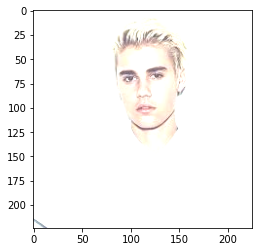

In [25]:
feature_1()

#### <b>Hàm main riêng cho yêu cầu 2</b>

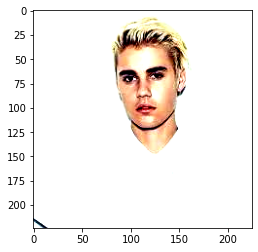

In [26]:
feature_2()

#### <b> Hàm main riêng cho yêu cầu 3</b>

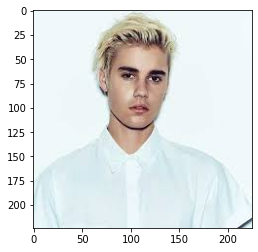

In [27]:
feature_3()

#### <b>Hàm main riêng cho yêu cầu 4</b>

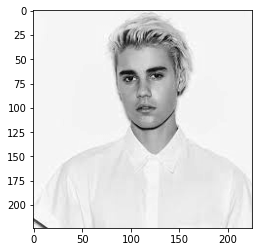

In [28]:
feature_4()

#### <b>Hàm main riêng cho yêu cầu 5</b>

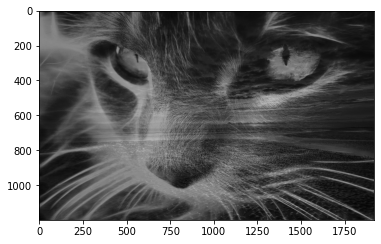

In [31]:
feature_5()

#### <b>Hàm main riêng cho yêu cầu 6</b>

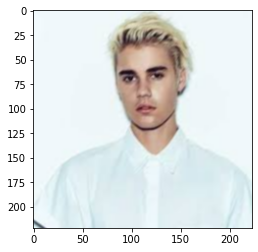

In [32]:
feature_6()

#### <b>Hàm main riêng cho yêu cầu 7</b>

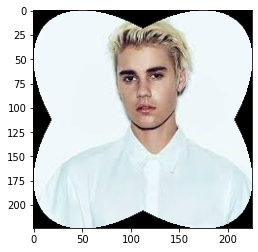

In [33]:
feature_7()